In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
movies=pd.read_csv("/content/IMDB-Movie-Data.csv")

In [3]:
movies.shape

(1000, 12)

In [4]:
movies.info

<bound method DataFrame.info of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of m

In [5]:
movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [6]:
movies.isnull()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,True,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Rank - 0%
Title - 0%
Genre - 0%
Description - 0%
Director - 0%
Actors - 0%
Year - 0%
Runtime (Minutes) - 0%
Rating - 0%
Votes - 0%
Revenue (Millions) - 13%
Metascore - 6%


In [9]:
remove_missing_value=movies.fillna(movies.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [10]:
remove_missing_value.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [11]:
movie=remove_missing_value

Text(0.5, 1.0, 'Revenue of top director(in millions)')

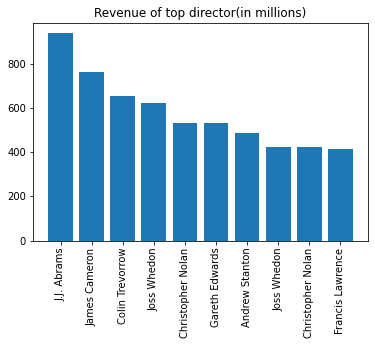

In [12]:
fig,ax=plt.subplots()
top_revenue_movies=movie.nlargest(n=12,columns=['Revenue (Millions)'])
ax.bar(top_revenue_movies['Director'],top_revenue_movies['Revenue (Millions)'])
ax.set_xticklabels(labels=top_revenue_movies['Director'],rotation=90)
ax.set_title("Revenue of top director(in millions)")

Text(0.5, 1.0, 'Votes of top director')

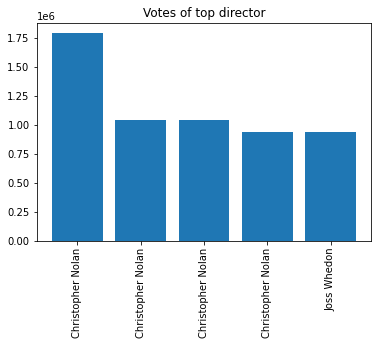

In [13]:
fig,ax=plt.subplots()
top_vote_movies=movie.nlargest(n=12,columns=['Votes'])
ax.bar(top_vote_movies['Director'],top_vote_movies['Votes'])
ax.set_xticklabels(labels=top_vote_movies['Director'],rotation=90)
ax.set_title("Votes of top director")

In [21]:
dir=top_revenue_movies.groupby(['Votes','Revenue (Millions)'])
dir.first()[['Director']]

,,Director
Votes,Revenue (Millions),
157026,486.29,Andrew Stanton
323118,532.17,Gareth Edwards
455169,652.18,Colin Trevorrow
516895,458.99,Joss Whedon
525646,424.65,Francis Lawrence
552027,423.03,Gore Verbinski
586669,414.98,Lee Unkrich
661608,936.63,J.J. Abrams
935408,760.51,James Cameron


Text(0.5, 1.0, 'Metascore vs Revenue')

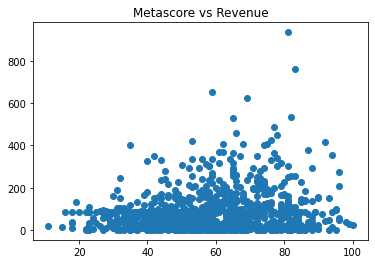

In [22]:
fig,ax=plt.subplots()
ax.scatter(movie['Metascore'],movie['Revenue (Millions)'])
ax.set_title("Metascore vs Revenue")


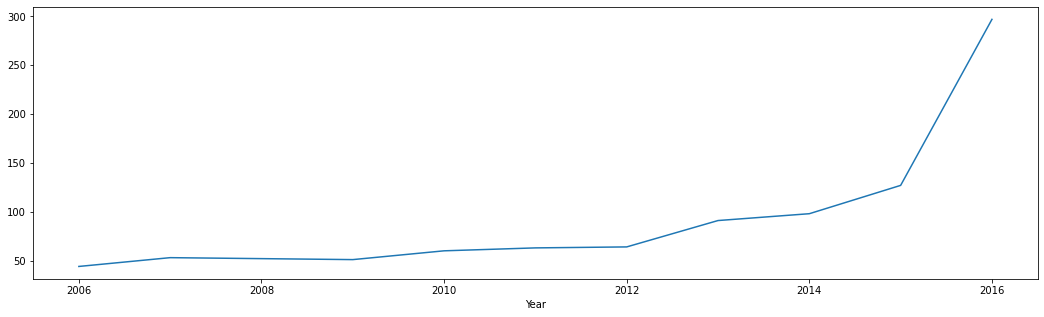

In [23]:
all_year = movie.groupby('Year')['Title'].count()
all_year.plot(figsize=(18,5))

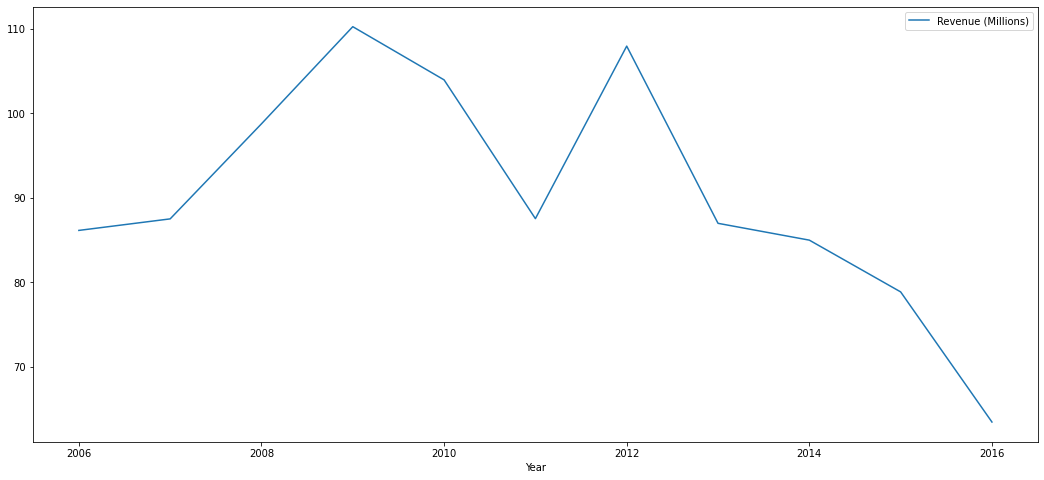

In [24]:
year = (movie[['Year','Revenue (Millions)']].groupby('Year').mean())
year.plot(figsize=(18,8))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


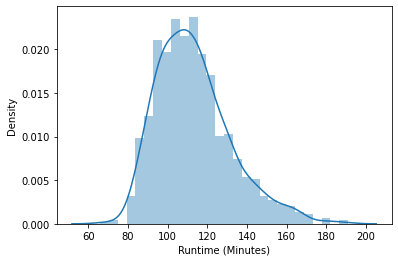

In [25]:
Run=(movie[(movie['Runtime (Minutes)'] < 250) & (movie['Runtime (Minutes)'] > 0)]['Runtime (Minutes)'])
sns.distplot(Run)

In [26]:
top_actors=movie[movie['Rating']>8.2]
top_actors[['Actors','Rating']]

,Actors,Rating
6,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",8.3
26,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",8.3
36,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6
54,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",9.0
64,"Christian Bale, Hugh Jackman, Scarlett Johanss...",8.5
77,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",8.3
80,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",8.8
96,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",8.6
99,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",8.5
117,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",8.8


In [27]:
top_actors_vote=movie.nlargest(n=10,columns=['Votes'])
top_actors_vote[['Actors','Votes']]


,Actors,Votes
54,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",1791916
80,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",1583625
124,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",1222645
36,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",1047747
76,"Robert Downey Jr., Chris Evans, Scarlett Johan...",1045588
144,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",1039115
77,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",959065
99,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",937414
87,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",935408
64,"Christian Bale, Hugh Jackman, Scarlett Johanss...",913152


In [28]:
max_revenue=movie.nlargest(n=5,columns=['Revenue (Millions)'])
max_2=max_revenue.groupby(['Year','Revenue (Millions)'])
max_2.first()

Rank                                       Title  \
Year Revenue (Millions)                                                     
2008 533.32                55                             The Dark Knight   
2009 760.51                88                                      Avatar   
2012 623.28                77                                The Avengers   
2015 652.18                86                              Jurassic World   
     936.63                51  Star Wars: Episode VII - The Force Awakens   

                                            Genre  \
Year Revenue (Millions)                             
2008 533.32                    Action,Crime,Drama   
2009 760.51              Action,Adventure,Fantasy   
2012 623.28                         Action,Sci-Fi   
2015 652.18               Action,Adventure,Sci-Fi   
     936.63              Action,Adventure,Fantasy   

                                                               Description  \
Year Revenue (Millions)                                                      
2008 533.32              When the menace known as the Joker wreaks havo...   
2009 760.51              A paraplegic marine dispatched to the moon Pan...   
2012 623.28              Earth's mightiest heroes must come together an...   
2015 652.18              A new theme park, built on the original site o...   
     936.63              Three decades after the defeat of the Galactic...   

                                  Director  \
Year Revenue (Millions)                      
2008 533.32              Christopher Nolan   
2009 760.51                  James Cameron   
2012 623.28                    Joss Whedon   
2015 652.18                Colin Trevorrow   
     936.63                    J.J. Abrams   

                                                                    Actors  \
Year Revenue (Millions)                                                      
2008 533.32              Christian Bale, Heath Ledger, Aaron Eckhart,Mi...   
2009 760.51              Sam Worthington, Zoe Saldana, Sigourney Weaver...   
2012 623.28              Robert Downey Jr., Chris Evans, Scarlett Johan...   
2015 652.18              Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...   
     936.63              Daisy Ridley, John Boyega, Oscar Isaac, Domhna...   

                         Runtime (Minutes)  Rating    Votes  Metascore  
Year Revenue (Millions)                                                 
2008 533.32                            152     9.0  1791916       82.0  
2009 760.51                            162     7.8   935408       83.0  
2012 623.28                            143     8.1  1045588       69.0  
2015 652.18                            124     7.0   455169       59.0  
     936.63                            136     8.1   661608       81.0

In [53]:
max_vote_of_Genre=movie.nlargest(n=1,columns=['Votes'])[['Genre','Title']]
max_vote_of_Genre

,Genre,Title
54,"Action,Crime,Drama",The Dark Knight


In [32]:
max_rate_of_Genre=movie.nlargest(n=5,columns=['Rating'])['Genre']
max_rate_of_Genre

54          Action,Crime,Drama
80     Action,Adventure,Sci-Fi
117     Action,Biography,Drama
36      Adventure,Drama,Sci-Fi
96     Animation,Drama,Fantasy
Name: Genre, dtype: object

In [ ]:
max_rate_of_rev=movie.nlargest(n=1,columns=['Revenue (Millions)'])['Genre']
max_rate_of_rev

50    Action,Adventure,Fantasy
Name: Genre, dtype: object

In [29]:
movie.set_index(['Rank'])
movie.stack()
mov2=movie['Genre'].str.split(',', expand=True)
mov2.stack()
mov2.unstack(-2)
mov2.reset_index(-1, drop=True)
mov2.reset_index()
mov2

,0,1,2
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,None
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy
...,...,...,...
995,Crime,Drama,Mystery
996,Horror,None,None
997,Drama,Music,Romance
998,Adventure,Comedy,None


In [30]:
movie['0']=mov2[0]
movie['1']=mov2[1]
movie['2']=mov2[2]
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,0,1,2
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0,Horror,Thriller,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0,Action,Adventure,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0,Crime,Drama,Mystery
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0,Horror,None,None
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0,Drama,Music,Romance
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,82.956376,22.0,Adventure,Comedy,None


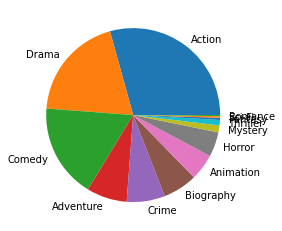

In [55]:
genre=movie.groupby(['0']).size().sort_values(ascending=False).reset_index()
genre.columns = ['genre', 'count']
labels = genre['genre']
size = genre['count']
plt.pie(size, labels = labels)
plt.show()

In [48]:
movie[(movie['0']=='Action')&(movie['Rating']>=9)][['Director','Title']]

,Director,Title
54,Christopher Nolan,The Dark Knight


In [50]:
movie[(movie['0']=='Drama')&(movie['Rating']>=8.5)][['Director','Title']]

,Director,Title
64,Christopher Nolan,The Prestige
133,Damien Chazelle,Whiplash
476,Florian Henckel von Donnersmarck,The Lives of Others
991,Aamir Khan,Taare Zameen Par


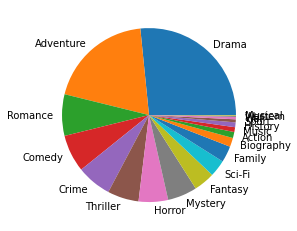

In [56]:
genre=movie.groupby(['1']).size().sort_values(ascending=False).reset_index()
genre.columns = ['genre', 'count']
labels = genre['genre']
size = genre['count']
plt.pie(size, labels = labels)
plt.show()

In [47]:
movie[(movie['1']=='Drama')&(movie['Rating']>=8.5)][['Director','Title']]

,Director,Title
36,Christopher Nolan,Interstellar
96,Makoto Shinkai,Kimi no na wa
99,Martin Scorsese,The Departed


In [51]:
movie[(movie['1']=='Adventure')&(movie['Rating']>=8.5)][['Director','Title']]

,Director,Title
80,Christopher Nolan,Inception


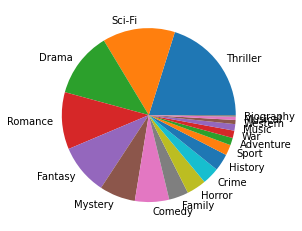

In [57]:
genre=movie.groupby(['2']).size().sort_values(ascending=False).reset_index()
genre.columns = ['genre', 'count']
labels = genre['genre']
size = genre['count']
plt.pie(size, labels = labels)
plt.show()

In [54]:
movie[(movie['2']=='Sci-Fi')&(movie['Rating']>=8.5)][['Director','Title']]

,Director,Title
36,Christopher Nolan,Interstellar
64,Christopher Nolan,The Prestige
80,Christopher Nolan,Inception
